**1. Importar librerias**

In [44]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import joblib

**2. Lectura del conjunto de datos**

Se realiza la lectura del conjunto de datos resultantes de la actividad 1


In [45]:
df = pd.read_csv('sample_data/archivo_datos_procesados.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_bin
0,37,entrepreneur,single,tertiary,no,1467,yes,yes,cellular,17,nov,349,1,-1,0,unknown,no,26-50
1,25,unemployed,single,secondary,no,34,no,yes,unknown,4,jul,316,1,-1,0,unknown,no,0-25
2,53,retired,married,secondary,no,1278,yes,no,telephone,15,jul,174,3,-1,0,unknown,no,51-75
3,31,housemaid,married,unknown,yes,-6,no,yes,telephone,7,jul,94,2,-1,0,unknown,no,26-50
4,43,unemployed,married,secondary,no,3529,no,no,cellular,5,feb,169,2,-1,0,unknown,no,26-50


**3. Random Forest**

Se ha seleccionado como algoritmo de mineria Random Forest, por su robustez, capacidad de menejo de datos mixtos y buena precisiòn para alcanzar el objetivo propuesto de identificar en que rango de edad estan los usuarios a los cuales el banco puede llegar con mayor efectividad para hacerlos participe de los productos financieros ofertados por el banco.

**Adaptaciones de los datos**

Para lograr dar el tratamiento adecuado para el modelo se haran las siguientes tareas con los datos



1.   Convertir la variable objetivo 'y' a binario (1, para 'yes' y 0 para 'no')
2.   Eliminar variables redundantes
3.   Dividir el conjunto de datos en características (X) y variable objetivo (y).


In [46]:
# Convertir la variable objetivo 'y' a binaria
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Guardar una copia de 'age_bin' para el análisis posterior
age_bin = df['age_bin'].copy()

# Identificar las columnas categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age_bin']

# Realizar One-Hot Encoding en las variables categóricas
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Eliminar variables redundantes
X = df.drop(['y'], axis=1)
y = df['y']


# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [47]:
df.tail()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age_bin_26-50,age_bin_51-75
3113,55,653,6,800,1,-1,0,0,False,False,...,False,False,False,False,False,False,False,True,False,True
3114,39,0,2,731,1,193,3,0,True,False,...,False,False,False,False,False,False,False,False,True,False
3115,35,0,14,125,2,-1,0,0,False,False,...,False,False,False,False,False,False,False,True,True,False
3116,37,105,17,260,4,-1,0,0,False,False,...,False,False,False,False,False,False,False,True,True,False
3117,63,474,25,423,1,-1,0,1,False,False,...,False,False,False,False,False,False,False,True,False,True


**4. Detalles del modelo**

Utilizare Random Forest con 100 estimadores, esperando obtener una buena precisión y entender la importancia de cada característica.



In [48]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calcular precisión, recall y F1-score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Accuracy: 0.9049145299145299
Confusion Matrix:
 [[813  19]
 [ 70  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       832
           1       0.64      0.33      0.43       104

    accuracy                           0.90       936
   macro avg       0.78      0.65      0.69       936
weighted avg       0.89      0.90      0.89       936

Precision: 0.6415094339622641
Recall: 0.3269230769230769
F1-Score: 0.4331210191082802


**5. Curva ROC**

La curva ROC (Receiver Operating Characteristic) es la herramienta gráfica que utilizo para evaluar el desempeño de un modelo de clasificación binaria.

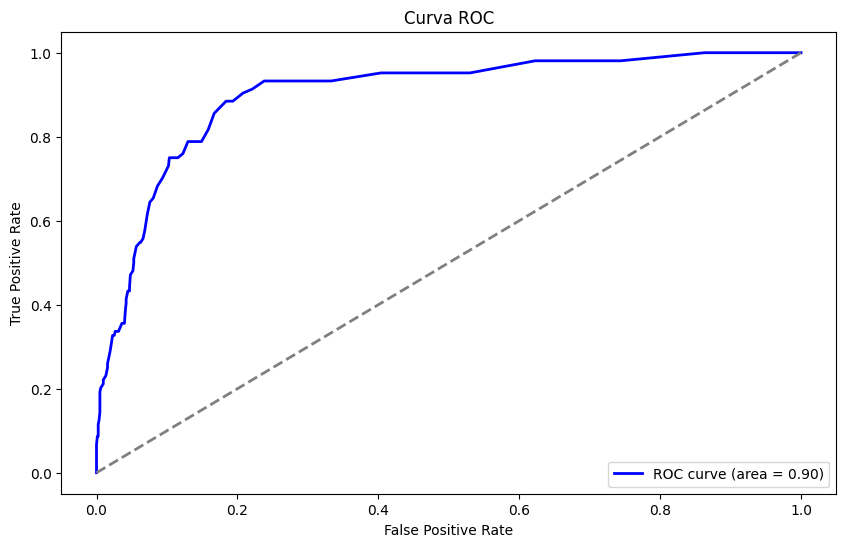

In [49]:
# Curva ROC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

El área bajo la curva ROC (AUC-ROC) es una medida de la capacidad de discriminación del modelo. Cuanto más cerca esté el valor de 1, mejor es el modelo en distinguir entre las clases positivas y negativas.

AUC = 0.5: El modelo no tiene capacidad de
discriminación (similar a lanzar una moneda).
0.5 < AUC < 1: El modelo tiene una cierta capacidad de discriminación.
AUC = 1: El modelo es perfecto en su capacidad de discriminación.

Teniendo en cuenta el AUC de 0.9 presente en el modelo podemos afirmar que el modelo tiene un desempeño muy bueno en términos de discriminación entre las clases. En otras palabras, el modelo es capaz de distinguir correctamente entre las instancias positivas y negativas el 90% del tiempo.  Por lo tanto seria un modelo confiable donde las instancias de clasificacion sean criticas, como estrategias de maketing, deteccion de fraudes, entre otros.

**6. Importancia de las caracteristicas y analisís de impacto de la edad**

En este apartado se realizan dos tipos de análisis cruciales después de entrenar el modelo de Random Forest para predecir la aceptación de productos bancarios.



1.   Análisis de la importacia de las características

Este análisis busca identificar cuáles características (variables) del conjunto de datos tienen mayor influencia en las predicciones del modelo. La importancia se calcula basándose en cómo cada característica contribuye a reducir la impureza de los nodos en los árboles de decisión del Random Forest.  Esto permitirá a los analistas y a los tomadores de decisiones entender qué variables son más relevantes para predecir si un cliente estará interesado en los productos bancarios ofrecidos. Esta información puede guiar estrategias de marketing y ventas al enfocarse en las características más influyentes para maximizar la efectividad de las campañas.

2.   Análisis de impacto de la edad en la predicción

Este análisis se centra en entender cómo la probabilidad de aceptación de productos bancarios varía según diferentes rangos de edad.  Esto brindará información sobre qué grupos de edad tienen más probabilidades de aceptar las ofertas del banco. Esto puede ser utilizado para personalizar y dirigir estrategias de marketing y productos específicamente hacia segmentos de edad que muestren mayor interés. Además, puede ayudar a adaptar las comunicaciones y las ofertas para maximizar la conversión y la satisfacción del cliente en diferentes grupos demográficos.



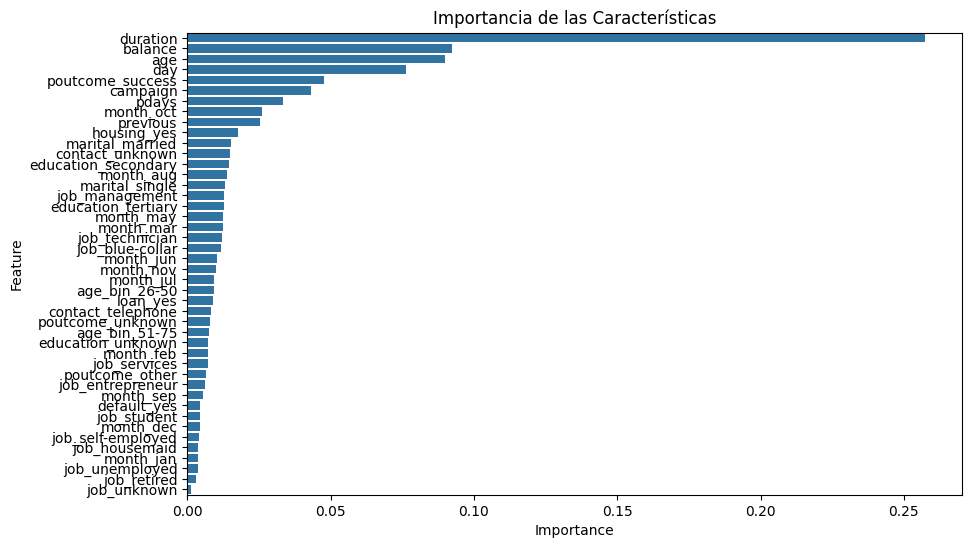

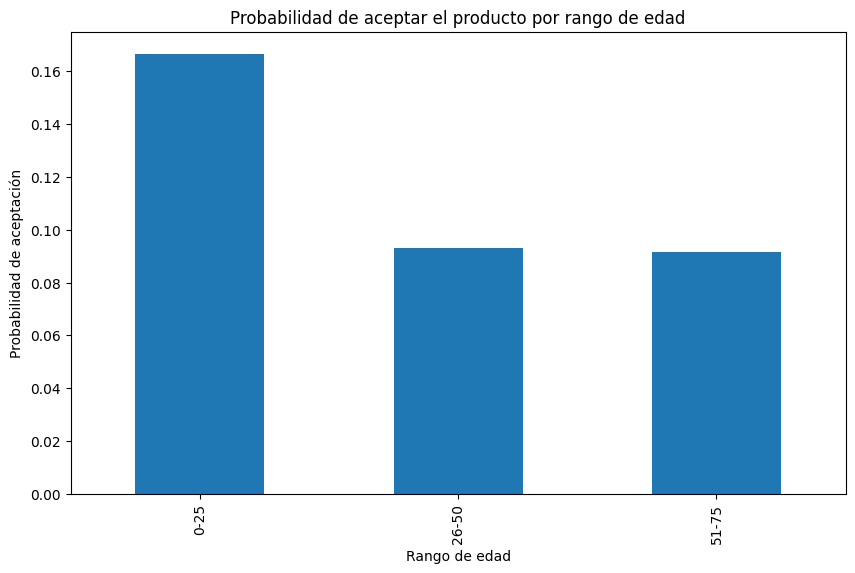

In [50]:
# Analizar la importancia de las características
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()

# Analizar el impacto de la edad en la predicción
df['age_bin'] = age_bin
df['prediction'] = rf_model.predict(X)
age_analysis = df.groupby('age_bin')['prediction'].mean()

plt.figure(figsize=(10, 6))
age_analysis.plot(kind='bar')
plt.title('Probabilidad de aceptar el producto por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Probabilidad de aceptación')
plt.show()

In [51]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']